In [1]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.optimize as sc_opt
import scipy.special as sc_spc

In [2]:
PS2NS=1e-3

In [3]:
def rational(x, p, q) :
    return np.polyval(p, x) / np.polyval(q + [1.0], x)
def rational_4_2(x, p0, p1, p2, p3, q1) :
    return rational(x, [p0, p1, p2, p3], [q1,])
def ratioder_4_2(x, p0, p1, p2, p3, q1) :
    return rational(x, [2*p0*q1, 3*p0+p1*q1, 2*p1, p2-p3*q1], [q1*q1, 2*q1,])
def ratiodr2_4_2(x, p0, p1, p2, p3, q1) :
    return rational(x, [2*p0*q1*q1, 6*p0*q1, 6*p0, 2*(p1-p2*q1+p3*q1*q1)], [q1**3, 3*q1*q1, 3*q1])

In [4]:
cos = lambda t : np.cos( np.deg2rad(t) )
sin = lambda t : np.sin( np.deg2rad(t) )
tan = lambda t : np.tan( np.deg2rad(t) )
cot = lambda t : 1.0/np.tan( np.deg2rad(t) )
tan_m1 = lambda t : np.rad2deg(np.arctan(t))
cos_m1 = lambda t : np.rad2deg(np.arccos(t))
sin_m1 = lambda t : np.rad2deg(np.arcsin(t))

In [5]:
sinh = lambda x, a, b, c : a*np.sinh(b-c*x)
gamma = 57.8

In [6]:
!ls

02_average_wMcent.py		    line_friction_old.py
50nm				    line_friction.py
AmorphousFriction		    line_friction_rough.py
AmorphousSpreading		    line_friction_shear_asymmetry.py
amorpous-spreading-reps-test.ipynb  line_friction_shear_old.py
asymmetry.py			    line_friction_shear.py
avg_density.py			    line_friction_spread.py
boundary_condition.py		    mkt_cox_old.py
channel_density.py		    mobility-rw.ipynb
channel_flow_profile.py		    mode_analysis.py
channel_flow.py			    movie_density.py
check_sp_artifact.ipynb		    movie_difference.py
cl-friction-amorphous.ipynb	    movie_dissipation_field.py
cl-friction-hexane.ipynb	    movie_kinetic_energy.py
cluster_hull.py			    movie_temperature.py
collapse-wall-velocity.py	    near-wall-velocity.ipynb
compare_angles.py		    observables_shear.py
compare_charges.py		    optimal_parameters_friction.py
compare-slip.py			    parameters1.txt
compare-slip-wathex.py		    parameters2.txt
compare_spreading.py		    parameters_large.txt
compare_vel.py	

In [7]:
!ls AmorphousSpreading

n06a02	n06a08	n08a04	n08a10	n10a06	n12a02	n12a08	n14a04	n14a10	n16a06
n06a04	n06a10	n08a06	n10a02	n10a08	n12a04	n12a10	n14a06	n16a02	n16a08
n06a06	n08a02	n08a08	n10a04	n10a10	n12a06	n14a02	n14a08	n16a04	n16a10


**--- START OF THE WORKFLOW ---**

In [8]:
# Problematic cases
"""
n08a02
n08a06
n08a08
n08a10
n10a04
n10a06
n12a02
n12a04
n12a08
n16a06
n16a08
"""

'\nn08a02\nn08a06\nn08a08\nn08a10\nn10a04\nn10a06\nn12a02\nn12a04\nn12a08\nn16a06\nn16a08\n'

In [23]:
folders_root = 'AmorphousSpreading/n16a08/'
folders = ['R0','R1','R2','R3','R4']

In [24]:
t = np.loadtxt(folders_root+folders[0]+'/time.txt')*PS2NS
nt = len(t)

In [25]:
def rd_m(p) :
    r = ratioder_4_2(t,*p)
    r[r>0] = 0
    return r 
def r2_p(p) :
    r = ratiodr2_4_2(t,*p)
    r[r<0] = 0
    return r

In [26]:
time_vec = []
angle_fit_vec = []
angle_l_vec = []
angle_r_vec = []
foot_l_vec = []
foot_r_vec = []
radius_fit_vec = []
sub_angle_l_vec = []
sub_angle_r_vec = []

In [27]:
for r in folders :
    time_vec.append(PS2NS*np.loadtxt(folders_root+r+'/time.txt'))
    angle_fit_vec.append(np.loadtxt(folders_root+r+'/angle_fit.txt'))
    angle_l_vec.append(np.loadtxt(folders_root+r+'/angle_l.txt'))
    angle_r_vec.append(np.loadtxt(folders_root+r+'/angle_r.txt'))
    foot_l_vec.append(np.loadtxt(folders_root+r+'/foot_l.txt'))
    foot_r_vec.append(np.loadtxt(folders_root+r+'/foot_r.txt'))
    radius_fit_vec.append(np.loadtxt(folders_root+r+'/radius_fit.txt'))
    sub_angle_l_vec.append(np.loadtxt(folders_root+r+'/sub_angle_l.txt'))
    sub_angle_r_vec.append(np.loadtxt(folders_root+r+'/sub_angle_r.txt'))

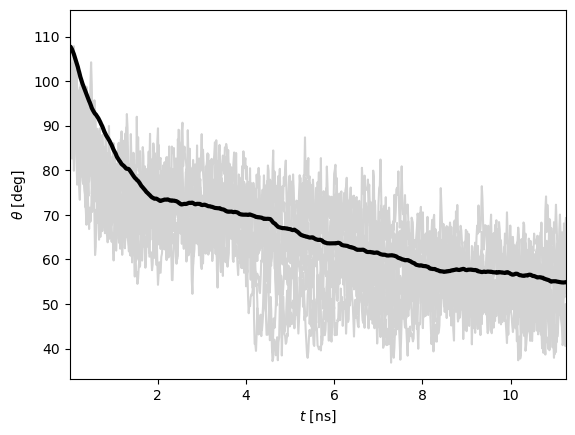

In [28]:
# %matplotlib notebook
%matplotlib inline
theta_avg = np.zeros(nt)
for i in range(len(folders)) :
    # theta_avg += angle_l_vec[i]
    # theta_avg += angle_r_vec[i]
    theta_avg += angle_fit_vec[i]
    plt.plot(time_vec[i],angle_l_vec[i],color="lightgray",linewidth=1.5)
    plt.plot(time_vec[i],angle_r_vec[i],color="lightgray",linewidth=1.5)
# theta_avg /= (2*len(folders))
theta_avg /= len(folders)
plt.plot(t,theta_avg,color="black",linewidth=3)
plt.xlim([t[0],t[-1]])
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$\theta$ [deg]')
plt.show()

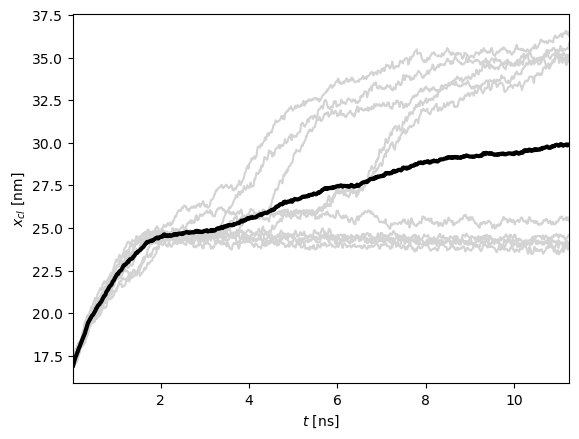

In [29]:
# %matplotlib notebook
%matplotlib inline
xcl_avg = np.zeros(nt)
for i in range(len(folders)) :
    x0 = 0.5*(foot_l_vec[i][0]+foot_r_vec[i][0])
    xcl_avg += x0-foot_l_vec[i]
    xcl_avg += foot_r_vec[i]-x0
    plt.plot(time_vec[i],x0-foot_l_vec[i],color="lightgray",linewidth=1.5)
    plt.plot(time_vec[i],foot_r_vec[i]-x0,color="lightgray",linewidth=1.5)
xcl_avg /= (2*len(folders))
plt.plot(t,xcl_avg,color="black",linewidth=3)
plt.xlim([t[0],t[-1]])
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$x_{cl}$ [nm]')
plt.show()

In [16]:
np.savez('x_avg.npz', x=t, y=xcl_avg)
np.savez('theta_g.npz', x=t, y=theta_avg)

**--- END OF THE WORKFLOW ---**

In [17]:
X = np.load('x_avg.npz')
t = X['x']
xcl_avg = X['y']
X = np.load('theta_g.npz')
theta_avg = X['y']

In [18]:
p0_ls=[1,1,1,1,1]
mv=1000
lvel=100 
lacc=10
def fres(p):
    return np.concatenate((xcl_avg-rational_4_2(t,*p),lvel*rd_m(p),lacc*r2_p(p)),axis=None)

ls_results = sc_opt.least_squares(fres,x0=p0_ls,max_nfev=mv)
popt1 = ls_results.x
x_fit = rational_4_2(t,*popt1)
v_fit = ratioder_4_2(t,*popt1)

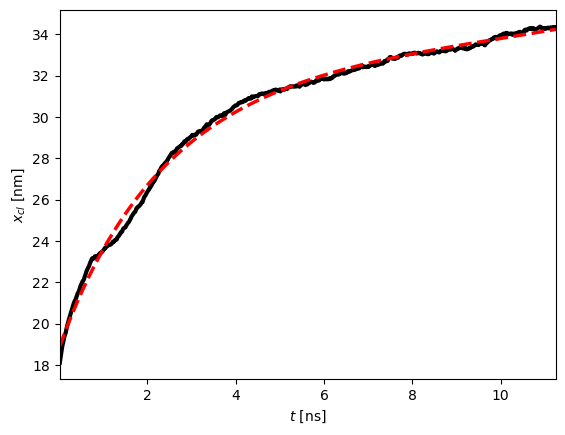

In [19]:
# %matplotlib notebook
%matplotlib inline
plt.plot(t,xcl_avg,color="black",linewidth=3)
plt.plot(t,x_fit,'r--',linewidth=2.5)
plt.xlim([t[0],t[-1]])
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$x_{cl}$ [nm]')
plt.show()

In [20]:
mv=10000

# w = np.abs(v_fit)
# w /= np.sum(w)
# popt2, pcov2 = sc_opt.curve_fit(sinh,cos(theta_avg),v_fit,maxfev=mv,sigma=np.sqrt(w))

popt2, pcov2 = sc_opt.curve_fit(sinh,cos(theta_avg),v_fit,maxfev=mv)

v_mkt = sinh(cos(theta_avg),*popt2)

In [21]:
muf = gamma/popt2[0]*popt2[2]
print('------------------------------------------')
print('muf_eff = '+str(muf)+' cP')
print('------------------------------------------')

------------------------------------------
muf_eff = 5.6476494153833696e-05 cP
------------------------------------------


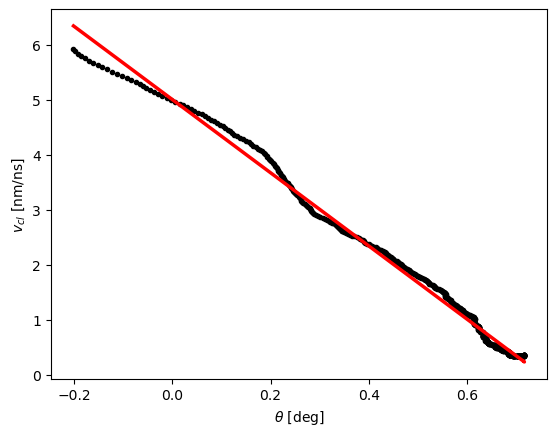

In [22]:
# %matplotlib notebook
%matplotlib inline
plt.plot(cos(theta_avg),v_fit,'k.',linewidth=3)
plt.plot(cos(theta_avg),v_mkt,'r-',linewidth=2.5)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$v_{cl}$ [nm/ns]')
plt.show()